### **`Pandas Case study On Indian Startup Funding Data 2015 - 2017`**

#### Importing Libraries

In [22]:
import os

In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pandas import DataFrame as show

import seaborn as sns
import squarify

%matplotlib inline

#### Reading and making dataframe of the csv formated file

    Here we convert categorical data to 'category' type

    csv file-(startup_funding_2015-2017.csv)- contains the information of all startups(india) from 2015 to 2017

In [24]:
dataframe = pd.read_csv("startup_funding_2015-2017.csv" , dtype = {
    'InvestmentType' : 'category'
})

#read_csv function is used to import dataset 'startup_funding.csv'

#### sample of our dataset (startup_funding_2015-2017.csv)

In [25]:
dataframe.head(4)#display first 4 rows of dataframe

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN


In [26]:
dataframe.tail(4)#display first 4 rows of dataframe

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
2371,2371,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"140,000",NaN


#### Metadata

    columns and index information

In [27]:
dataframe.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   SNo               2372 non-null   int64   
 1   Date              2372 non-null   object  
 2   StartupName       2372 non-null   object  
 3   IndustryVertical  2201 non-null   object  
 4   SubVertical       1436 non-null   object  
 5   CityLocation      2193 non-null   object  
 6   InvestorsName     2364 non-null   object  
 7   InvestmentType    2371 non-null   category
 8   AmountInUSD       1525 non-null   object  
 9   Remarks           419 non-null    object  
dtypes: category(1), int64(1), object(8)
memory usage: 169.6+ KB


dimentions of dataframe

In [28]:
print('Rows {rows} and Columns {columns}'.format(rows=dataframe.shape[0],columns=dataframe.shape[1]))

Rows 2372 and Columns 10


### **`Cleaning Data`**

#### **Problem**

    Dataset doesn't have proper format

In [29]:
dataframe.dtypes

SNo                    int64
Date                  object
StartupName           object
IndustryVertical      object
SubVertical           object
CityLocation          object
InvestorsName         object
InvestmentType      category
AmountInUSD           object
Remarks               object
dtype: object

#### repersentation of missing data

- here yellow bars repersent the null values(missing values)
- since we can see that 'remarks' has the higher density of missing data,we can neglect this column
- here we can use estimated statistical values of available data of attribute('AmountInUSD') to fill the missing values

#### dataframe contains lots of NaN(null values)

In [30]:
dataframe.apply(lambda x : sum (x.isnull()))

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64

<Axes: >

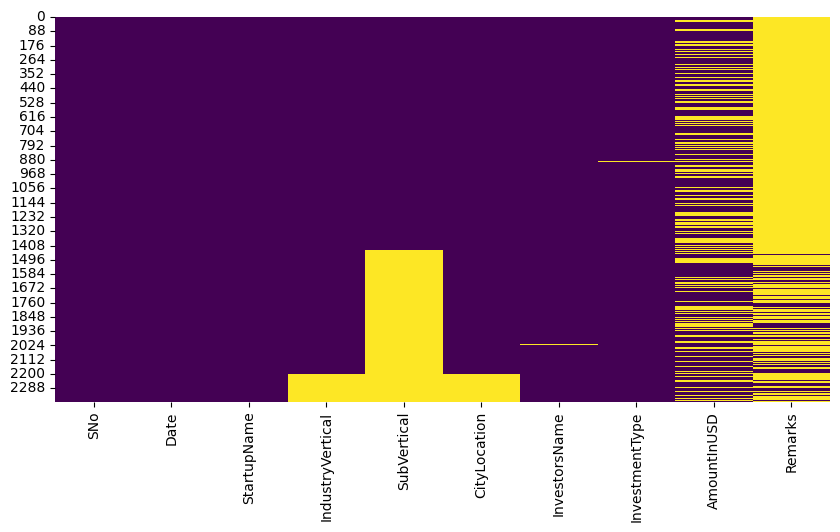

In [31]:
plt.figure(figsize=(10 , 5))

sns.heatmap(dataframe.isnull() , cmap='viridis' ,  cbar=False)

        Using Heatmap we can easily see which column contains Null values

#### specifying format error

        some dates are not formated where generalized format is 'dd/mm/yy'

In [32]:
dataframe[dataframe['Date']=='12/05.2015']['Date']#here '.' is there instead of '/'

2103    12/05.2015
2104    12/05.2015
Name: Date, dtype: object

#### Amount in usd has ','(notnumeric) chracters and null values

    datatype is not numerical

In [33]:

dataframe['AmountInUSD'].head()

0    1,300,000
1          NaN
2          NaN
3      500,000
4      850,000
Name: AmountInUSD, dtype: object

#### solving problem with missing data
- WE CAN FILL THE MISSING NUMERICAL VALUES USING FOLLWING STATISTICAL METHODS- -BY MODE OF CENTRAL TENDENCY

   - BACKWARD FILLING

   - FORWARD FILLING

   - INTERPOLATION(LINEAR)

#### Cleaning missing data and formatting

##### handling null in cities column

In [34]:
dataframe['CityLocation'] = dataframe['CityLocation'].fillna(value='NotSpecific')

In [35]:
dataframe['IndustryVertical'] = dataframe['IndustryVertical'].fillna(value='other')

In [36]:
dataframe.sample(5)

# here we can see the all nan values from column 'CityLocation' and 'IndustryVertical' are changed to notspecific and other

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
1260,1260,08/02/2016,Xpressbees,ECommerce,ECommerce Logistics solutions,Pune,"SAIF Partners, IDG Ventures India, Vertex Vent...",Private Equity,"12,500,000",NaN
2241,2241,24/03/2015,Furlenco,other,NaN,NotSpecific,LightBox Ventures,Private Equity,"6,000,000",Series A
1695,1695,27/10/2015,Simpli5d,Online user engagement platform,NaN,Gurgaon,"Redcliffe Capital, YourNest Angel Fund",Private Equity,NaN,Bridge Funding
611,611,07/10/2016,KOOH Sports,Technology,Sports Training & Technology,Mumbai,"HDFC, Faering Capital, Elevate Sports",Private Equity,"2,200,000",NaN
68,68,12/06/2017,LendingKart,Consumer Internet,Online Lending platform,Ahmedabad,Yes Bank,Debt Funding,"7,800,000",NaN


##### Formatting citylocation

In [37]:
import re

# importing regular expression

def convert_Slash(x) : # converts cityLocation where multiple citiescentres

    x = x.lower()

    if re.search('/' , x):

        return x.split('/')[0].strip()
    
    else : 

        return x.strip()
    

dataframe['CityLocation'] = dataframe['CityLocation'].apply(convert_Slash)

#### Backup of dataframe

    deleting unwanted columns

In [38]:
newdf = dataframe.copy()

del newdf['Remarks']
del newdf['SNo']

#### Investmenttype column has repeated values of categories

##### categories have alphabetical error

- this column has unformatted categories which results in repetition error(spaces between words)

- here -Seed Funding and SeedFunding are same

In [39]:
newdf['InvestmentType'].value_counts().index

CategoricalIndex(['Seed Funding', 'Private Equity', 'SeedFunding',
                  'Crowd Funding', 'Crowd funding', 'Debt Funding',
                  'PrivateEquity'],
                 categories=['Crowd Funding', 'Crowd funding', 'Debt Funding', 'Private Equity', 'PrivateEquity', 'Seed Funding', 'SeedFunding'], ordered=False, dtype='category')

In [40]:
newdf['InvestmentType'] = newdf['InvestmentType'].apply(lambda x : x.replace(" " ,"").lower())

#### Fomatting dates to time series

In [41]:
def rem_err_date(x):#function checks for error in format of date column in funding dataframe
    if re.search('.',x):
        return x.replace('.','')
    return x
newdf['Date']=newdf['Date'].apply(rem_err_date)
newdf['Date'].replace('12/052015','12/05/2015',inplace=True)
newdf['Date'].replace('15/012015','15/01/2015',inplace=True)
newdf['Date'].replace('22/01//2015','22/01/2015',inplace=True)
newdf['Date'].replace('13/042015','13/04/2015',inplace=True)
newdf['Date']=pd.to_datetime(newdf['Date'],format='%d/%m/%Y')

In [42]:
newdf.dtypes['Date']

dtype('<M8[ns]')

#### calculating number of investors for each startup

- as various startups have multiple number of investors arrange according to the number of investors for a particular startup(startup name)

In [43]:
def calculate_n_investors(x):

    if re.search(',' , x) and x != 'empty':

        return len(x.split(','))
    
    elif x != 'empty':

        return 1
    
    else :
        return -1

In [45]:
newdf['numberofinvestors'] = newdf['InvestorsName'].replace(np.NAN , 'empty').apply(calculate_n_investors)

In [46]:
newdf

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,numberofinvestors
0,2017-08-01,TouchKin,Technology,Predictive Care Platform,bangalore,Kae Capital,privateequity,"1,300,000",1
1,2017-08-02,Ethinos,Technology,Digital Marketing Agency,mumbai,Triton Investment Advisors,privateequity,NaN,1
2,2017-08-02,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,new delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",seedfunding,NaN,7
3,2017-08-02,Zepo,Consumer Internet,DIY Ecommerce platform,mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",seedfunding,"500,000",4
4,2017-08-02,Click2Clinic,Consumer Internet,healthcare service aggregator,hyderabad,"Narottam Thudi, Shireesh Palle",seedfunding,"850,000",2
...,...,...,...,...,...,...,...,...,...
2367,2015-01-29,Printvenue,other,NaN,notspecific,Asia Pacific Internet Group,privateequity,"4,500,000",1
2368,2015-01-29,Graphene,other,NaN,notspecific,KARSEMVEN Fund,privateequity,"825,000",1
2369,2015-01-30,Mad Street Den,other,NaN,notspecific,"Exfinity Fund, GrowX Ventures.",privateequity,"1,500,000",2
2370,2015-01-30,Simplotel,other,NaN,notspecific,MakeMyTrip,privateequity,NaN,1


#### most multiple investors for individual startup

In [53]:
n_inv = newdf.loc[: , ['StartupName' , 'InvestorsName' , 'numberofinvestors']].sort_values('numberofinvestors' , ascending=False)

##### visualizing the number of investors per startup

- visualizing the top 10 as per number of investors
- here maximum number of investors per startup is 10

In [54]:
n_inv.head(10)

,StartupName,InvestorsName,numberofinvestors
1338,MyChild App,"Samir Bangara, Anisha Mittal, Amit Gupta, Pall...",10
348,Innov8,"Vijay Shekhar Sharma, Rajan Anandan, Kunal Sha...",10
1377,Zapr,"Flipkart, Saavn, Micromax, Dhiraj Rajaram, Amb...",9
473,GoComet,"India Quotient, Rajul Garg, Rajesh Yabaji, Cha...",8
568,Hubilo,"Girish Mathrubootham, VC Karthic, Miten Mehta,...",8
1617,Indifi,"Accel Partners, Elevar Equity, Pramod Bhasin, ...",8
1219,HashLearn,"Bhavish Aggarwal, Binny Bansal, Rajan Anandan...",8
2197,Dazo,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",8
701,infeedo,"Dheeraj Jain, Palash Jain, Anupam Mittal, Amee...",8
1043,Parentlane,"Sujeet Kumar, Aprameya, Sumit Jain, Subramanya...",8


<Axes: xlabel='numberofinvestors', ylabel='count'>

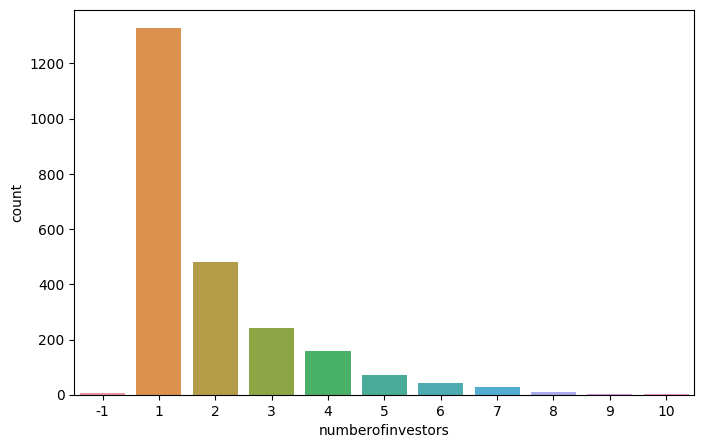

In [55]:
plt.figure(figsize=(8 , 5))

sns.countplot(x = 'numberofinvestors' , data = n_inv)

#### FILLING MISSING VALUES IN AmountInUSD

- AmountinUSD column is formatted to integer

In [76]:
def convert_AmountInUSD(x):
    if re.search(',',x):
        return (x.replace(',',''))
    return x
newdf['AmountInUSD']=newdf[newdf['AmountInUSD'].notnull()]['AmountInUSD'].apply(convert_AmountInUSD).astype('int')

In [77]:
newdf['AmountInUSD'] = round(newdf['AmountInUSD'].fillna(np.mean(newdf['AmountInUSD'])))
newdf['AmountInUSD'] = newdf['AmountInUSD'].astype('int')

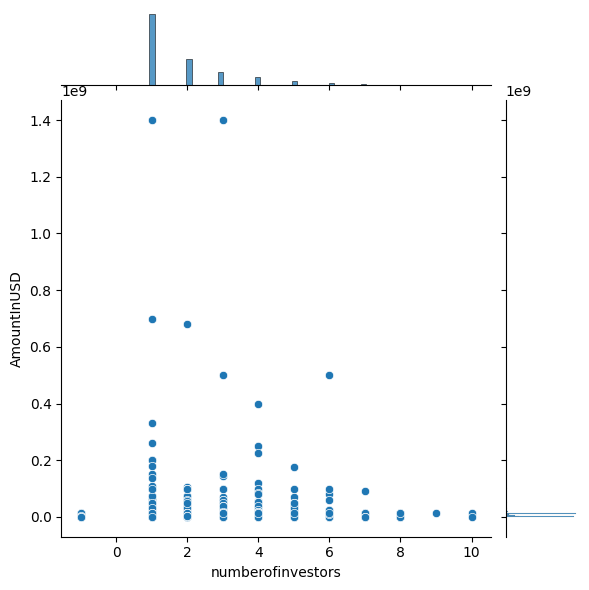

In [78]:
sns.jointplot(x='numberofinvestors',y='AmountInUSD',data=newdf)